<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9818174	total: 54.8ms	remaining: 54.7s
1:	learn: 0.9487746	total: 55.3ms	remaining: 27.6s
2:	learn: 0.9174489	total: 56.5ms	remaining: 18.8s
3:	learn: 0.8865196	total: 56.9ms	remaining: 14.2s
4:	learn: 0.8608844	total: 57.1ms	remaining: 11.4s
5:	learn: 0.8325093	total: 63.4ms	remaining: 10.5s


6:	learn: 0.8092205	total: 67.6ms	remaining: 9.59s
7:	learn: 0.7855499	total: 68.3ms	remaining: 8.47s
8:	learn: 0.7593434	total: 70ms	remaining: 7.71s
9:	learn: 0.7353361	total: 72.5ms	remaining: 7.18s
10:	learn: 0.7122329	total: 73.1ms	remaining: 6.57s
11:	learn: 0.6898004	total: 73.6ms	remaining: 6.06s
12:	learn: 0.6670757	total: 74.4ms	remaining: 5.65s
13:	learn: 0.6464012	total: 75.3ms	remaining: 5.31s
14:	learn: 0.6261608	total: 76ms	remaining: 4.99s
15:	learn: 0.6055504	total: 76.3ms	remaining: 4.69s
16:	learn: 0.5872772	total: 76.5ms	remaining: 4.42s
17:	learn: 0.5695490	total: 77ms	remaining: 4.2s
18:	learn: 0.5550037	total: 77.2ms	remaining: 3.98s
19:	learn: 0.5372381	total: 77.5ms	remaining: 3.8s
20:	learn: 0.5202718	total: 77.7ms	remaining: 3.62s
21:	learn: 0.5057386	total: 77.9ms	remaining: 3.46s
22:	learn: 0.4900985	total: 78.9ms	remaining: 3.35s
23:	learn: 0.4739071	total: 79.5ms	remaining: 3.23s
24:	learn: 0.4584939	total: 79.8ms	remaining: 3.11s
25:	learn: 0.4449953	tot

167:	learn: 0.0450620	total: 152ms	remaining: 752ms
168:	learn: 0.0448973	total: 154ms	remaining: 755ms
169:	learn: 0.0447013	total: 154ms	remaining: 752ms
170:	learn: 0.0445846	total: 155ms	remaining: 750ms
171:	learn: 0.0443909	total: 155ms	remaining: 747ms
172:	learn: 0.0441700	total: 156ms	remaining: 744ms
173:	learn: 0.0439915	total: 156ms	remaining: 742ms
174:	learn: 0.0438056	total: 157ms	remaining: 739ms
175:	learn: 0.0436442	total: 157ms	remaining: 736ms
176:	learn: 0.0434958	total: 158ms	remaining: 733ms
177:	learn: 0.0433141	total: 158ms	remaining: 730ms
178:	learn: 0.0431628	total: 159ms	remaining: 728ms
179:	learn: 0.0429764	total: 159ms	remaining: 726ms
180:	learn: 0.0427894	total: 160ms	remaining: 723ms
181:	learn: 0.0426158	total: 160ms	remaining: 720ms
182:	learn: 0.0424905	total: 161ms	remaining: 717ms
183:	learn: 0.0423176	total: 161ms	remaining: 715ms
184:	learn: 0.0420128	total: 162ms	remaining: 713ms
185:	learn: 0.0418867	total: 162ms	remaining: 710ms
186:	learn: 

284:	learn: 0.0308675	total: 212ms	remaining: 532ms
285:	learn: 0.0307502	total: 212ms	remaining: 530ms
286:	learn: 0.0306400	total: 213ms	remaining: 528ms
287:	learn: 0.0305579	total: 213ms	remaining: 526ms
288:	learn: 0.0305151	total: 215ms	remaining: 529ms
289:	learn: 0.0304420	total: 215ms	remaining: 527ms
290:	learn: 0.0303388	total: 216ms	remaining: 526ms
291:	learn: 0.0302389	total: 216ms	remaining: 525ms
292:	learn: 0.0301793	total: 217ms	remaining: 523ms
293:	learn: 0.0301109	total: 217ms	remaining: 521ms
294:	learn: 0.0299619	total: 217ms	remaining: 519ms
295:	learn: 0.0299001	total: 217ms	remaining: 517ms
296:	learn: 0.0297909	total: 218ms	remaining: 515ms
297:	learn: 0.0297384	total: 218ms	remaining: 513ms
298:	learn: 0.0296961	total: 218ms	remaining: 512ms
299:	learn: 0.0296413	total: 219ms	remaining: 511ms
300:	learn: 0.0295776	total: 219ms	remaining: 509ms
301:	learn: 0.0294363	total: 219ms	remaining: 507ms
302:	learn: 0.0293721	total: 220ms	remaining: 505ms
303:	learn: 

456:	learn: 0.0218344	total: 292ms	remaining: 347ms
457:	learn: 0.0218015	total: 293ms	remaining: 346ms
458:	learn: 0.0217885	total: 293ms	remaining: 345ms
459:	learn: 0.0217392	total: 294ms	remaining: 345ms
460:	learn: 0.0216663	total: 294ms	remaining: 344ms
461:	learn: 0.0216352	total: 294ms	remaining: 343ms
462:	learn: 0.0216143	total: 295ms	remaining: 342ms
463:	learn: 0.0215978	total: 296ms	remaining: 342ms
464:	learn: 0.0215768	total: 296ms	remaining: 341ms
465:	learn: 0.0215534	total: 296ms	remaining: 340ms
466:	learn: 0.0215179	total: 297ms	remaining: 339ms
467:	learn: 0.0214842	total: 298ms	remaining: 338ms
468:	learn: 0.0214625	total: 298ms	remaining: 338ms
469:	learn: 0.0214334	total: 298ms	remaining: 337ms
470:	learn: 0.0214150	total: 299ms	remaining: 336ms
471:	learn: 0.0213676	total: 299ms	remaining: 335ms
472:	learn: 0.0213316	total: 299ms	remaining: 334ms
473:	learn: 0.0212624	total: 300ms	remaining: 333ms
474:	learn: 0.0212287	total: 300ms	remaining: 332ms
475:	learn: 

564:	learn: 0.0191364	total: 351ms	remaining: 270ms
565:	learn: 0.0191112	total: 352ms	remaining: 270ms
566:	learn: 0.0190932	total: 354ms	remaining: 270ms
567:	learn: 0.0190743	total: 356ms	remaining: 270ms
568:	learn: 0.0190370	total: 356ms	remaining: 270ms
569:	learn: 0.0190066	total: 357ms	remaining: 269ms
570:	learn: 0.0189840	total: 357ms	remaining: 268ms
571:	learn: 0.0189631	total: 357ms	remaining: 267ms
572:	learn: 0.0189475	total: 360ms	remaining: 268ms
573:	learn: 0.0189239	total: 383ms	remaining: 285ms
574:	learn: 0.0188925	total: 385ms	remaining: 284ms
575:	learn: 0.0188530	total: 386ms	remaining: 284ms
576:	learn: 0.0188235	total: 387ms	remaining: 284ms
577:	learn: 0.0187950	total: 390ms	remaining: 285ms
578:	learn: 0.0187627	total: 393ms	remaining: 286ms
579:	learn: 0.0187290	total: 394ms	remaining: 285ms
580:	learn: 0.0187020	total: 395ms	remaining: 285ms
581:	learn: 0.0186822	total: 396ms	remaining: 285ms
582:	learn: 0.0186727	total: 398ms	remaining: 284ms
583:	learn: 

625:	learn: 0.0178552	total: 443ms	remaining: 265ms
626:	learn: 0.0178426	total: 444ms	remaining: 264ms
627:	learn: 0.0178128	total: 446ms	remaining: 264ms
628:	learn: 0.0177748	total: 447ms	remaining: 264ms
629:	learn: 0.0177558	total: 448ms	remaining: 263ms
630:	learn: 0.0177332	total: 448ms	remaining: 262ms
631:	learn: 0.0177163	total: 449ms	remaining: 262ms
632:	learn: 0.0177042	total: 451ms	remaining: 261ms
633:	learn: 0.0176897	total: 452ms	remaining: 261ms
634:	learn: 0.0176786	total: 453ms	remaining: 260ms
635:	learn: 0.0176666	total: 455ms	remaining: 260ms
636:	learn: 0.0176328	total: 457ms	remaining: 260ms
637:	learn: 0.0176286	total: 458ms	remaining: 260ms
638:	learn: 0.0176113	total: 460ms	remaining: 260ms
639:	learn: 0.0175985	total: 462ms	remaining: 260ms
640:	learn: 0.0175783	total: 464ms	remaining: 260ms
641:	learn: 0.0175443	total: 472ms	remaining: 263ms
642:	learn: 0.0175176	total: 473ms	remaining: 263ms
643:	learn: 0.0174921	total: 477ms	remaining: 263ms
644:	learn: 

673:	learn: 0.0169440	total: 510ms	remaining: 246ms
674:	learn: 0.0169153	total: 512ms	remaining: 247ms
675:	learn: 0.0169009	total: 513ms	remaining: 246ms
676:	learn: 0.0168782	total: 514ms	remaining: 245ms
677:	learn: 0.0168692	total: 514ms	remaining: 244ms
678:	learn: 0.0168500	total: 516ms	remaining: 244ms
679:	learn: 0.0168416	total: 516ms	remaining: 243ms
680:	learn: 0.0168250	total: 517ms	remaining: 242ms
681:	learn: 0.0168125	total: 518ms	remaining: 241ms
682:	learn: 0.0168030	total: 519ms	remaining: 241ms
683:	learn: 0.0167925	total: 519ms	remaining: 240ms
684:	learn: 0.0167813	total: 520ms	remaining: 239ms
685:	learn: 0.0167601	total: 521ms	remaining: 238ms
686:	learn: 0.0167461	total: 521ms	remaining: 238ms
687:	learn: 0.0167345	total: 522ms	remaining: 237ms
688:	learn: 0.0167183	total: 522ms	remaining: 236ms
689:	learn: 0.0166972	total: 524ms	remaining: 235ms
690:	learn: 0.0166897	total: 525ms	remaining: 235ms
691:	learn: 0.0166815	total: 528ms	remaining: 235ms
692:	learn: 

763:	learn: 0.0156248	total: 601ms	remaining: 186ms
764:	learn: 0.0156195	total: 606ms	remaining: 186ms
765:	learn: 0.0156124	total: 606ms	remaining: 185ms
766:	learn: 0.0155935	total: 607ms	remaining: 184ms
767:	learn: 0.0155815	total: 608ms	remaining: 184ms
768:	learn: 0.0155551	total: 609ms	remaining: 183ms
769:	learn: 0.0155427	total: 610ms	remaining: 182ms
770:	learn: 0.0155378	total: 612ms	remaining: 182ms
771:	learn: 0.0155285	total: 612ms	remaining: 181ms
772:	learn: 0.0155213	total: 614ms	remaining: 180ms
773:	learn: 0.0155153	total: 614ms	remaining: 179ms
774:	learn: 0.0155009	total: 616ms	remaining: 179ms
775:	learn: 0.0154972	total: 617ms	remaining: 178ms
776:	learn: 0.0154742	total: 618ms	remaining: 177ms
777:	learn: 0.0154717	total: 619ms	remaining: 177ms
778:	learn: 0.0154664	total: 620ms	remaining: 176ms
779:	learn: 0.0154563	total: 621ms	remaining: 175ms
780:	learn: 0.0154518	total: 622ms	remaining: 175ms
781:	learn: 0.0154339	total: 624ms	remaining: 174ms
782:	learn: 

825:	learn: 0.0148731	total: 666ms	remaining: 140ms
826:	learn: 0.0148601	total: 667ms	remaining: 140ms
827:	learn: 0.0148552	total: 669ms	remaining: 139ms
828:	learn: 0.0148368	total: 669ms	remaining: 138ms
829:	learn: 0.0148287	total: 670ms	remaining: 137ms
830:	learn: 0.0148181	total: 671ms	remaining: 136ms
831:	learn: 0.0148087	total: 672ms	remaining: 136ms
832:	learn: 0.0147989	total: 673ms	remaining: 135ms
833:	learn: 0.0147876	total: 674ms	remaining: 134ms
834:	learn: 0.0147780	total: 675ms	remaining: 133ms
835:	learn: 0.0147739	total: 676ms	remaining: 133ms
836:	learn: 0.0147666	total: 678ms	remaining: 132ms
837:	learn: 0.0147583	total: 678ms	remaining: 131ms
838:	learn: 0.0147374	total: 679ms	remaining: 130ms
839:	learn: 0.0147263	total: 680ms	remaining: 130ms
840:	learn: 0.0147146	total: 681ms	remaining: 129ms
841:	learn: 0.0146995	total: 682ms	remaining: 128ms
842:	learn: 0.0146917	total: 683ms	remaining: 127ms
843:	learn: 0.0146803	total: 684ms	remaining: 126ms
844:	learn: 

923:	learn: 0.0137006	total: 756ms	remaining: 62.2ms
924:	learn: 0.0136898	total: 758ms	remaining: 61.5ms
925:	learn: 0.0136587	total: 759ms	remaining: 60.7ms
926:	learn: 0.0136555	total: 760ms	remaining: 59.8ms
927:	learn: 0.0136512	total: 760ms	remaining: 59ms
928:	learn: 0.0136468	total: 763ms	remaining: 58.3ms
929:	learn: 0.0136429	total: 764ms	remaining: 57.5ms
930:	learn: 0.0136376	total: 764ms	remaining: 56.6ms
931:	learn: 0.0136301	total: 765ms	remaining: 55.8ms
932:	learn: 0.0136217	total: 766ms	remaining: 55ms
933:	learn: 0.0136154	total: 767ms	remaining: 54.2ms
934:	learn: 0.0135999	total: 768ms	remaining: 53.4ms
935:	learn: 0.0135960	total: 769ms	remaining: 52.5ms
936:	learn: 0.0135847	total: 769ms	remaining: 51.7ms
937:	learn: 0.0135768	total: 770ms	remaining: 50.9ms
938:	learn: 0.0135642	total: 771ms	remaining: 50.1ms
939:	learn: 0.0135528	total: 774ms	remaining: 49.4ms
940:	learn: 0.0135470	total: 775ms	remaining: 48.6ms
941:	learn: 0.0135297	total: 777ms	remaining: 47.8

985:	learn: 0.0130965	total: 821ms	remaining: 11.7ms
986:	learn: 0.0130733	total: 822ms	remaining: 10.8ms
987:	learn: 0.0130691	total: 823ms	remaining: 9.99ms
988:	learn: 0.0130638	total: 824ms	remaining: 9.16ms
989:	learn: 0.0130590	total: 824ms	remaining: 8.32ms
990:	learn: 0.0130431	total: 825ms	remaining: 7.49ms
991:	learn: 0.0130209	total: 825ms	remaining: 6.66ms
992:	learn: 0.0130137	total: 826ms	remaining: 5.82ms
993:	learn: 0.0130078	total: 826ms	remaining: 4.99ms
994:	learn: 0.0129945	total: 827ms	remaining: 4.16ms
995:	learn: 0.0129794	total: 830ms	remaining: 3.33ms
996:	learn: 0.0129358	total: 831ms	remaining: 2.5ms
997:	learn: 0.0129340	total: 832ms	remaining: 1.67ms
998:	learn: 0.0129217	total: 835ms	remaining: 835us
999:	learn: 0.0129091	total: 836ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02437111820393888
ABC Pre-generator MAE 0.7419292106902143


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

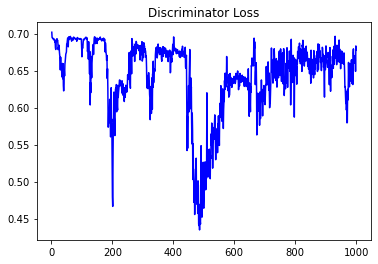

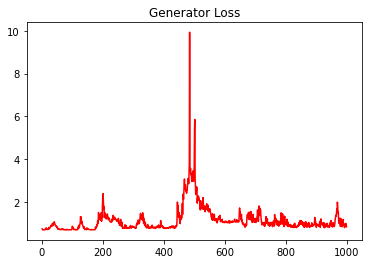

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.04965883009619527


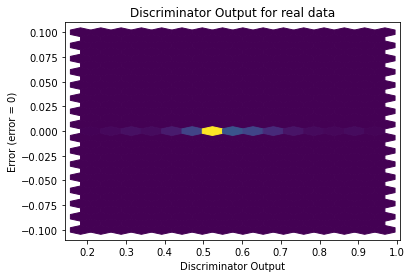

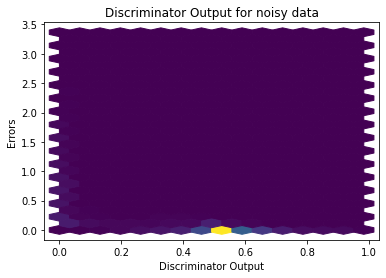

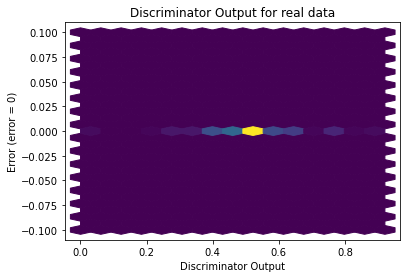

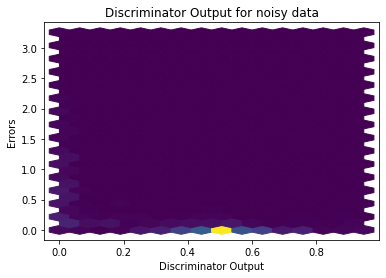

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())